MODELOS DE RNN (LSTM) PARA DEMANDA DE GAS NATURAL EN SECTOR PETROLERO EN MÉXICO

Importamos la data de Demanda de gas en sector PETROLERO como un CSV

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
csv_demanda_petrolero_original = pd.read_csv('Demanda_petrolero_2022_full1.csv',index_col='Date',parse_dates=True)
csv_demanda_petrolero_original

,Demanded_Gas
Date,
2005-01-01,2039.88
2005-02-01,2015.25
2005-03-01,1969.51
2005-04-01,2008.19
2005-05-01,2041.86
...,...
2022-05-01,1919.43
2022-06-01,1876.88
2022-07-01,1979.70


Vamos a graficar los datos "originales" de demanda eléctrico desde 2005 hasta 2022

Text(0, 0.5, 'Demanda [MMpcd]')

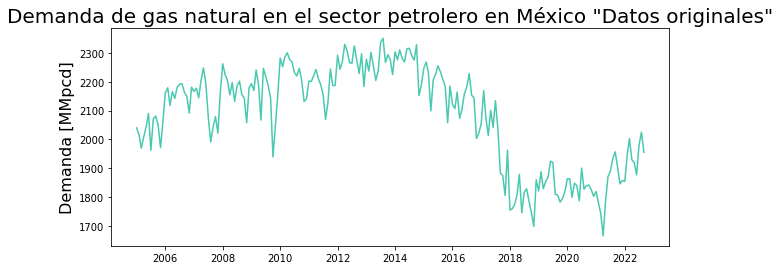

In [25]:
plt.figure(figsize=(10,4))
plt.plot(csv_demanda_petrolero_original, color='#48C9B0')
plt.title('Demanda de gas natural en el sector petrolero en México "Datos originales"', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize =16)

Vamos a descomponer la serie de tiempo de datos "originales" de demanda eléctrico desde 2005 hasta 2022 en sus compoentes de Tendencia, Estacionalidad y Residual 

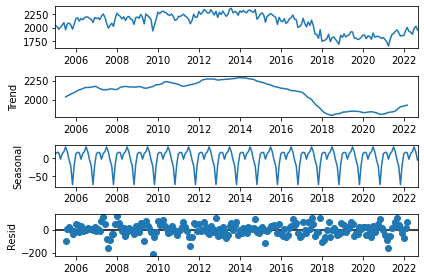

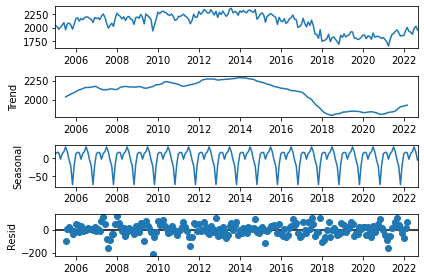

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

csv_demanda_petrolero_original_seasonal_decomposition = seasonal_decompose(csv_demanda_petrolero_original)
csv_demanda_petrolero_original_seasonal_decomposition.plot()

Separamos la Demanda de gas natural en el sector petrolero en data de train y test

In [27]:
# Number of data points to keep for testing (in this case, the last 12)
num_test_points = 12

# Split the data into training and testing sets
csv_demanda_petrolero_original_train_data = csv_demanda_petrolero_original[:-num_test_points]
csv_demanda_petrolero_original_test_data = csv_demanda_petrolero_original[-num_test_points:]

csv_demanda_petrolero_original_train_data

,Demanded_Gas
Date,
2005-01-01,2039.88
2005-02-01,2015.25
2005-03-01,1969.51
2005-04-01,2008.19
2005-05-01,2041.86
...,...
2021-05-01,1785.32
2021-06-01,1870.67
2021-07-01,1889.20


Se generan sets de n_input datos para con ellos predecir el t+1 dato, y así los siguientes n_input para predecir el t+1, etc 

In [28]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [29]:
n_input = 24

# Assuming you have a column in your DataFrame named 'demand_data' that contains your time series data
data = csv_demanda_petrolero_original_train_data['Demanded_Gas'].values
targets = data  # You can adjust this if your target data is different

demanda_petrolero_NOscaled_train_generator = TimeseriesGenerator(data, targets, length=n_input, batch_size=1)

In [30]:
X,y = demanda_petrolero_NOscaled_train_generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[2039.88 2015.25 1969.51 2008.19 2041.86 2089.82 1962.26 2070.46 2080.82
 2050.56 1971.14 2059.68 2161.66 2178.75 2117.61 2165.25 2142.03 2180.68
 2191.06 2193.12 2163.43 2150.04 2091.42 2180.87]
Predict this y: 
 [2166.37]


In [31]:
X,y = demanda_petrolero_NOscaled_train_generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[2015.25 1969.51 2008.19 2041.86 2089.82 1962.26 2070.46 2080.82 2050.56
 1971.14 2059.68 2161.66 2178.75 2117.61 2165.25 2142.03 2180.68 2191.06
 2193.12 2163.43 2150.04 2091.42 2180.87 2166.37]
Predict this y: 
 [2177.1]


Se importan las librerias necesarias y se define la RNN(LSTM)

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [33]:
n_input = 24
n_features = 1
# define model
model_LSTM_and_Dense = Sequential()
model_LSTM_and_Dense.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model_LSTM_and_Dense.add(Dense(1))
model_LSTM_and_Dense.compile(optimizer='adam', loss='mse')

In [34]:
model_LSTM_and_Dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamos el modelo RNN(LSTM) + Dense Layers con el demanda_electrico_scaled_train_generator

In [35]:
model_LSTM_and_Dense.fit(demanda_petrolero_NOscaled_train_generator, epochs=25)

Epoch 1/25
177/177 [==============================] - 4s 8ms/step - loss: 858369.6250
Epoch 2/25
177/177 [==============================] - 2s 9ms/step - loss: 301323.0625
Epoch 3/25
177/177 [==============================] - 1s 7ms/step - loss: 64870.8867
Epoch 4/25
177/177 [==============================] - 1s 7ms/step - loss: 66255.2266
Epoch 5/25
177/177 [==============================] - 1s 8ms/step - loss: 127980.5391
Epoch 6/25
177/177 [==============================] - 1s 8ms/step - loss: 295567.7188
Epoch 7/25
177/177 [==============================] - 1s 7ms/step - loss: 11059.3096
Epoch 8/25
177/177 [==============================] - 1s 8ms/step - loss: 11761.8301
Epoch 9/25
177/177 [==============================] - 1s 7ms/step - loss: 18771.6055
Epoch 10/25
177/177 [==============================] - 1s 7ms/step - loss: 10958.3203
Epoch 11/25
177/177 [==============================] - 1s 7ms/step - loss: 9942.3740
Epoch 12/25
177/177 [==============================] - 1s 7m

Se grafica la perdida por epoch 

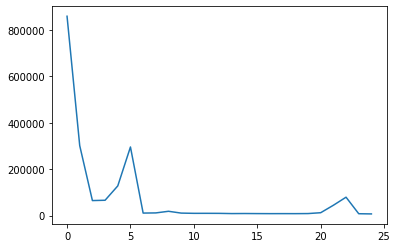

In [36]:
loss_per_epoch = model_LSTM_and_Dense.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

Se lleva a cabo el forecast de los ultimos 12 meses usando el modelo model_LSTM_and_Dense previamente definido y entrenado

Se toman los ULTIMOS n_input elementos de los datos de train y se almacenan en un batch

In [37]:
data = csv_demanda_petrolero_original_train_data['Demanded_Gas'].values

demanda_petrolero_NOscaled_train_batch = data[-n_input:]


demanda_petrolero_NOscaled_train_batch

array([1782.6 , 1794.63, 1818.35, 1863.28, 1863.28, 1799.17, 1848.19,
       1839.68, 1786.97, 1900.31, 1827.31, 1839.67, 1841.23, 1824.71,
       1802.58, 1819.26, 1778.16, 1743.17, 1665.17, 1785.32, 1870.67,
       1889.2 , 1933.02, 1956.84])

Se reescala el batch de los datos de train a que tenga la misma forma que los datos con que se entrenó el modelo que fueron  1, input_shape=(n_input, n_features)

In [38]:
demanda_petrolero_NOscaled_train_batch_reshaped = demanda_petrolero_NOscaled_train_batch.reshape(1,n_input, n_features)
demanda_petrolero_NOscaled_train_batch_reshaped

array([[[1782.6 ],
        [1794.63],
        [1818.35],
        [1863.28],
        [1863.28],
        [1799.17],
        [1848.19],
        [1839.68],
        [1786.97],
        [1900.31],
        [1827.31],
        [1839.67],
        [1841.23],
        [1824.71],
        [1802.58],
        [1819.26],
        [1778.16],
        [1743.17],
        [1665.17],
        [1785.32],
        [1870.67],
        [1889.2 ],
        [1933.02],
        [1956.84]]])

Intentamos predecir el sigueinte valor dado el primet batch de n_input. Esto equivaldria a predecir el primer valor de los datos de test, dados los n_input anteriores

In [39]:
model_LSTM_and_Dense.predict(demanda_petrolero_NOscaled_train_batch_reshaped)

1/1 [==============================] - 0s 358ms/step


array([[1848.1329]], dtype=float32)

Ahora ser hará una función que irá formando batch de n_input para ir prediciendo el siguiente valor, tal como se hizo en el entrenamiento del modelo 

In [28]:
n_input = 24
n_features = 1

In [40]:
test_predictions_model_LSTM_and_Dense = []

first_eval_batch = csv_demanda_petrolero_original_train_data['Demanded_Gas'].values[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(csv_demanda_petrolero_original_test_data['Demanded_Gas'])):
    
    # get the prediction value for the first batch
    current_pred = model_LSTM_and_Dense.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions_model_LSTM_and_Dense.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 24ms/step


In [41]:
test_predictions_model_LSTM_and_Dense 

[array([1848.1329], dtype=float32),
 array([1865.9708], dtype=float32),
 array([1860.9543], dtype=float32),
 array([1881.7853], dtype=float32),
 array([1889.2472], dtype=float32),
 array([1890.1978], dtype=float32),
 array([1874.5645], dtype=float32),
 array([1858.9478], dtype=float32),
 array([1843.5159], dtype=float32),
 array([1848.4476], dtype=float32),
 array([1865.2654], dtype=float32),
 array([1882.4078], dtype=float32)]

In [42]:
csv_demanda_petrolero_original_test_data

,Demanded_Gas
Date,
2021-10-01,1904.21
2021-11-01,1845.70
2021-12-01,1857.40
2022-01-01,1854.42
2022-02-01,1947.12
2022-03-01,2002.63
2022-04-01,1929.47
2022-05-01,1919.43
2022-06-01,1876.88


In [43]:
csv_demanda_petrolero_original_test_data['Demanded_Gas'].values

array([1904.21, 1845.7 , 1857.4 , 1854.42, 1947.12, 2002.63, 1929.47,
       1919.43, 1876.88, 1979.7 , 2024.82, 1955.19])

Text(0, 0.5, 'Demanda [MMpcd]')

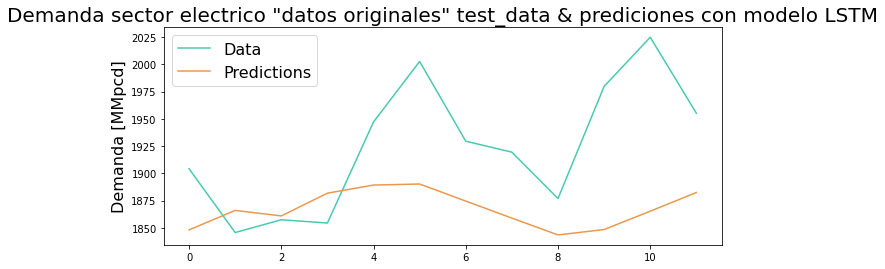

In [44]:
##Ploting the predicitons vs the test_data
plt.figure(figsize =(10,4))
plt.plot(csv_demanda_petrolero_original_test_data['Demanded_Gas'].values, color='#48C9B0')
plt.plot(test_predictions_model_LSTM_and_Dense , color='#EB984E')
plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Demanda sector electrico "datos originales" test_data & prediciones con modelo LSTM', fontsize=20)
plt.ylabel('Demanda [MMpcd]', fontsize=16)

In [46]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Compute errors
MAPE_test_predictions_model_LSTM_and_Dense = mean_absolute_percentage_error(csv_demanda_petrolero_original_test_data['Demanded_Gas'].values, test_predictions_model_LSTM_and_Dense)
RMSE_test_predictions_model_LSTM_and_Dense = np.sqrt(mean_squared_error(csv_demanda_petrolero_original_test_data['Demanded_Gas'].values, test_predictions_model_LSTM_and_Dense))

print('MAPE:', MAPE_test_predictions_model_LSTM_and_Dense)
print('RMSE:', RMSE_test_predictions_model_LSTM_and_Dense)

MAPE: 0.033586125431181064
RMSE: 79.62165616989995
